<a href="https://colab.research.google.com/github/Suraez/tensorflow-hands_on/blob/main/NLP/twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/cosmos98/twitter-and-reddit-sentimental-analysis-dataset')

ModuleNotFoundError: ignored

In [ ]:
import pandas as pd
df = pd.read_csv('/content/twitter-and-reddit-sentimental-analysis-dataset/Twitter_Data.csv')

In [ ]:
df.columns

Index(['clean_text', 'category'], dtype='object')

In [ ]:
df.shape

(162980, 2)

In [ ]:
df = df.head(500)

In [ ]:
df.shape

(500, 2)

In [ ]:
df.index

RangeIndex(start=0, stop=500, step=1)

In [ ]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
for i, row in df.iterrows():
  print(row['clean_text'])

In [ ]:
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm

In [ ]:
sentimentStats = {
    'pos': 0,
    'neu': 0,
    'neg': 0
}

for i, row in df.iterrows():
  if row['category'] == 1.0:
    sentimentStats['pos'] += 1
  elif row['category'] == 0.0:
    sentimentStats['neu'] += 1
  else:
    sentimentStats['neg'] += 1

sentimentStats


{'pos': 209, 'neu': 188, 'neg': 103}

In [ ]:
df['category'].value_counts()

 1.0    209
 0.0    188
-1.0    103
Name: category, dtype: int64

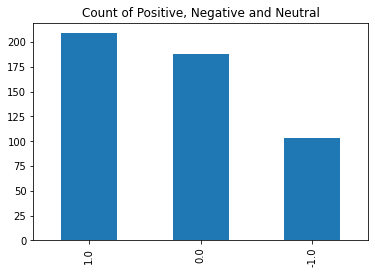

In [ ]:
df['category'].value_counts().plot(kind='bar', title="Count of Positive, Negative and Neutral")
plt.show() # removes weird title at the top and opens the figure in the current window

In [ ]:
df.iloc[10]['clean_text']

'things like demonetisation gst goods and services tax…the upper castes would sort either view favourably say that need give this more time other castes like dalits the muslims were more against because that’ just not modi’ constituency2'

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
tokens = nltk.word_tokenize(df.iloc[1]['clean_text'])

In [ ]:
taggedSentence = nltk.pos_tag(tokens)

In [ ]:
!pip install svgling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 KB 4.8 MB/s eta 0:00:00


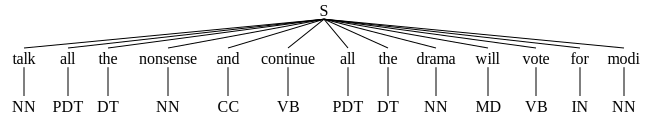

In [ ]:
chunked_text = nltk.chunk.ne_chunk(taggedSentence)
chunked_text

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [ ]:
sia = SentimentIntensityAnalyzer()
sentence = df['clean_text'][10]
sia.polarity_scores(sentence)

{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'compound': 0.6124}

In [ ]:
sentimentDict = sia.polarity_scores(sentence)
sentiment = max(sentimentDict, key=sentimentDict.get)
sentiment

'neu'

In [ ]:
sentence = df['clean_text'][0]
sentimentDict = sia.polarity_scores(sentence)
print(sentimentDict)
sentiment = max(sentimentDict, key=sentimentDict.get)
print(sentiment)

{'neg': 0.065, 'neu': 0.781, 'pos': 0.154, 'compound': 0.5267}
neu


In [ ]:
sentimentCompare = []
sentimentMapDict = {
    'pos': 1.0,
    'neu': 0.0,
    'neg': -1.0
}
index = 0
for i, row in tqdm(df.iterrows()):
  try:
    sentimentCompareDict = {}
    sentence = row['clean_text']
    sentimentDict = sia.polarity_scores(sentence)
    sentimentDict.pop('compound')
    sentiment = max(sentimentDict, key=sentimentDict.get)
    sentimentCompareDict['Id'] = index
    sentimentCompareDict['vader'] = sentimentMapDict[sentiment]
    sentimentCompareDict['original'] = row['category']
    sentimentCompare.append(sentimentCompareDict)
    index += 1
  except Exception:
    print("error occured for id", index)



0it [00:00, ?it/s]

error occured for id 148


{'Id': 498, 'vader': 0.0, 'original': 1.0}

In [ ]:
sentimentCompare

[{'Id': 0, 'vader': 0.0, 'original': -1.0},
 {'Id': 1, 'vader': 0.0, 'original': 0.0},
 {'Id': 2, 'vader': 0.0, 'original': 1.0},
 {'Id': 3, 'vader': 0.0, 'original': 1.0},
 {'Id': 4, 'vader': 0.0, 'original': 1.0},
 {'Id': 5, 'vader': 0.0, 'original': 0.0},
 {'Id': 6, 'vader': 0.0, 'original': 0.0},
 {'Id': 7, 'vader': 0.0, 'original': 0.0},
 {'Id': 8, 'vader': 0.0, 'original': 1.0},
 {'Id': 9, 'vader': 0.0, 'original': 1.0},
 {'Id': 10, 'vader': 0.0, 'original': 1.0},
 {'Id': 11, 'vader': 0.0, 'original': 1.0},
 {'Id': 12, 'vader': 0.0, 'original': 1.0},
 {'Id': 13, 'vader': 0.0, 'original': 0.0},
 {'Id': 14, 'vader': 0.0, 'original': 0.0},
 {'Id': 15, 'vader': 0.0, 'original': -1.0},
 {'Id': 16, 'vader': 0.0, 'original': 0.0},
 {'Id': 17, 'vader': 0.0, 'original': 0.0},
 {'Id': 18, 'vader': 0.0, 'original': 1.0},
 {'Id': 19, 'vader': 0.0, 'original': -1.0},
 {'Id': 20, 'vader': 0.0, 'original': 1.0},
 {'Id': 21, 'vader': 0.0, 'original': -1.0},
 {'Id': 22, 'vader': 0.0, 'original': 

In [ ]:
res = pd.DataFrame(sentimentCompare)

In [ ]:
res.shape
res

,Id,vader,original
0,0,0.0,-1.0
1,1,0.0,0.0
2,2,0.0,1.0
3,3,0.0,1.0
4,4,0.0,1.0
...,...,...,...
494,494,0.0,1.0
495,495,0.0,-1.0
496,496,0.0,-1.0
497,497,0.0,1.0


In [ ]:
print(res['vader'].value_counts()) # vader analysis
print(res['original'].value_counts())

 0.0    477
 1.0     14
-1.0      8
Name: vader, dtype: int64
 1.0    209
 0.0    187
-1.0    103
Name: original, dtype: int64


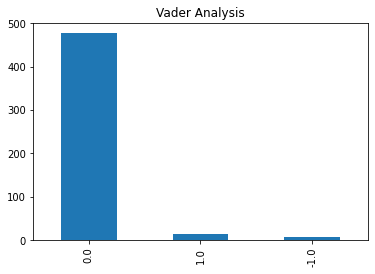

In [ ]:
res['vader'].value_counts().plot(kind='bar', title='Vader Analysis')
plt.show()

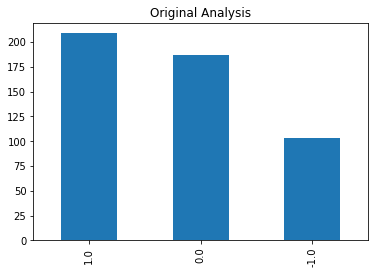

In [ ]:
res['original'].value_counts().plot(kind='bar', title='Original Analysis')
plt.show()

In [ ]:
res['vader'].value_counts()

 0.0    477
 1.0     14
-1.0      8
Name: vader, dtype: int64

In [ ]:
res['original'].value_counts()

 1.0    209
 0.0    187
-1.0    103
Name: original, dtype: int64

In [ ]:
vader = dict(res['vader'].value_counts())
vader = list(vader.values())
original = dict(res['original'].value_counts())
original = list(original.values())
original[0], original[1] = original[1], original[0]
print(vader, original)

[477, 14, 8] [187, 209, 103]


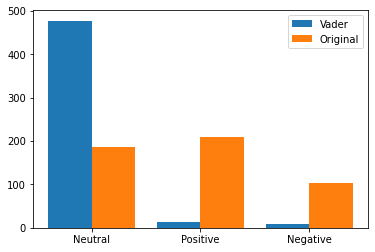

In [ ]:
import numpy as np
xAxisTitle = ['Neutral', 'Positive', 'Negative']
xAxis = np.arange(len(xAxisTitle))
plt.bar(xAxis-0.2, vader, width=0.4, label='Vader')
plt.bar(xAxis+0.2, original, width=0.4, label='Original')
plt.xticks(xAxis, xAxisTitle)
plt.legend()
plt.show()

we can see above VADER doesn't perform well in case of twitter dataset. It predicts mostly neutral


### TODO: USE transformer model to see the comparision between original and transformer model prediction